In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re

In [ ]:
price = []
sqft = []
price_sqft = []
type_bhk = []
agent = []
area = []
date_of_posted = []
direction = []
parkings = []
for i in range(1,1000):
    url= f"https://www.commonfloor.com/hyderabad-property/for-sale?page={i}"
    response = requests.get(url)
    page = BeautifulSoup(response.text)
    for i in page.find_all("span",class_="s_p"):
        if re.findall(".",i.text):
            price.append("".join(re.findall(".",i.text)))
        else: 
            price.append(np.nan)

    for i in page.find_all("a",class_="snblink clearfix"):
        if re.findall("(\d.+)\(",i.text):
            sqft.append("".join(re.findall("(\d.+)\(",i.text)))
        else:
            sqft.append(np.nan)
            
    for i in page.find_all("a",class_="snblink clearfix"):
        if re.findall("\@(\s\d.+)\/",i.text):
            price_sqft.append("".join(re.findall("\@(\s\d.+)\/",i.text)))
        else:
            price_sqft.append(np.nan)
    
    for i in page.find_all("div",class_="infownertext"):
        if re.findall("Agent.+\n(\w.+)",i.text):
            agent.append("".join(re.findall("Agent.+\n(\w.+)",i.text)))
        else:
            agent.append(np.nan)
            
    for i in page.find_all("div",class_="posteddate"):
        if re.findall("\:\s(\d+)",i.text):
            date_of_posted.append("".join(re.findall("\:\s(\d+)",i.text)))
        else:
            date_of_posted.append(np.nan)
            
    for i in page.find_all("div",class_="st_title"):
        if re.findall("\d+\s*BHK\s[A-Za-z]+",i.text):
            type_bhk.append("".join(re.findall("\d+\s*BHK\s[A-Za-z]+",i.text)))
        else:
            type_bhk.append(np.nan)
            
    for i in page.find_all("div",class_="st_title"):
        if re.findall("in\s(\w.+)",i.text):
            area.append("".join(re.findall("in\s(\w.+)",i.text)))
        else:
            area.append(np.nan)
    for i in page.find_all("div",class_="st_title"):
        if re.findall(".",i.text):
            direction.append("".join(re.findall(".",i.text)))
        else:
            direction.append(np.nan)
    for i in page.find_all("div",class_="st_title"):
        if re.findall(".",i.text):
            parkings.append("".join(re.findall(".",i.text)))
        else:
            parkings.append(np.nan)


<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\@'
<>:28: SyntaxWarning: invalid escape sequence '\@'
<>:33: SyntaxWarning: invalid escape sequence '\w'
<>:34: SyntaxWarning: invalid escape sequence '\w'
<>:39: SyntaxWarning: invalid escape sequence '\:'
<>:40: SyntaxWarning: invalid escape sequence '\:'
<>:45: SyntaxWarning: invalid escape sequence '\d'
<>:46: SyntaxWarning: invalid escape sequence '\d'
<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\@'
<>:28: SyntaxWarning: invalid escape sequence '\@'
<>:33: SyntaxWarning: invalid escape sequence '\w'
<>:34: SyntaxWarning: invalid escape sequence '\w'
<>:39: SyntaxWarning: invalid escape sequence '\:'
<>:40: SyntaxWarning: invalid e

In [ ]:
print(len(price),len(price_sqft),len(sqft),len(area),len(type_bhk),len(agent),len(date_of_posted))

In [5]:
df = pd.DataFrame({"a":sqft,"b":price,"c":price_sqft,"d":area,"q":type_bhk,"t":date_of_posted,"x":agent,"y":direction,"z":parkings})

In [6]:
df.to_csv("project_data_long.csv")

In [2]:
df = pd.read_csv("project_data_Long.csv")

In [3]:
df

,Unnamed: 0,a,b,c,d,q,t,x,y,z
0,0,1800 sq.ft,64 L,3556,Srisailam Highway,NaN,3.0,venkat,east,UnKnown
1,1,1300 sq.ft,70.20 L,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,2,1108 sq.ft,43.67 L,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,3,1742 sq.ft,1.27 Cr,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,4,814 sq.ft,31 L,3808,Beeramguda,2 BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...,...
23965,23965,864 sq.ft,46.65 L,5400,Rani Vihar,2 BHK Apartment,17.0,Nisha Reddy,east,No
23966,23966,1226 sq.ft,1.07 Cr,8793,Sharada Nagar-Dilsukh Nagar,3 BHK Apartment,17.0,Sunil Patel,east,Yes
23967,23967,1520 sq.ft,1.25 Cr,8250,Vimana Puri,3 BHK Apartment,17.0,Parul Reddy,east,No
23968,23968,1154 sq.ft,82.48 L,7148,Yakhutpura,2 BHK Apartment,17.0,Aarav Chauhan,east,No


In [15]:
#removing the Unnamed: 0 column

In [23]:
df.drop(columns='Unnamed: 0',inplace=True)

NameError: name 'df' is not defined

In [5]:
df

,a,b,c,d,q,t,x,y,z
0,1800 sq.ft,64 L,3556,Srisailam Highway,NaN,3.0,venkat,east,UnKnown
1,1300 sq.ft,70.20 L,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,1108 sq.ft,43.67 L,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,1742 sq.ft,1.27 Cr,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,814 sq.ft,31 L,3808,Beeramguda,2 BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...
23965,864 sq.ft,46.65 L,5400,Rani Vihar,2 BHK Apartment,17.0,Nisha Reddy,east,No
23966,1226 sq.ft,1.07 Cr,8793,Sharada Nagar-Dilsukh Nagar,3 BHK Apartment,17.0,Sunil Patel,east,Yes
23967,1520 sq.ft,1.25 Cr,8250,Vimana Puri,3 BHK Apartment,17.0,Parul Reddy,east,No
23968,1154 sq.ft,82.48 L,7148,Yakhutpura,2 BHK Apartment,17.0,Aarav Chauhan,east,No


In [20]:
#giving column names

In [6]:
df.columns = ["Area_sq.ft","Price","Price_per_sq.ft","Locality","Type_of_house","Booking_start","Agent_Name","Direction","parking"]

In [7]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking
0,1800 sq.ft,64 L,3556,Srisailam Highway,NaN,3.0,venkat,east,UnKnown
1,1300 sq.ft,70.20 L,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,1108 sq.ft,43.67 L,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,1742 sq.ft,1.27 Cr,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,814 sq.ft,31 L,3808,Beeramguda,2 BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...
23965,864 sq.ft,46.65 L,5400,Rani Vihar,2 BHK Apartment,17.0,Nisha Reddy,east,No
23966,1226 sq.ft,1.07 Cr,8793,Sharada Nagar-Dilsukh Nagar,3 BHK Apartment,17.0,Sunil Patel,east,Yes
23967,1520 sq.ft,1.25 Cr,8250,Vimana Puri,3 BHK Apartment,17.0,Parul Reddy,east,No
23968,1154 sq.ft,82.48 L,7148,Yakhutpura,2 BHK Apartment,17.0,Aarav Chauhan,east,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_sq.ft       23970 non-null  object 
 1   Price            23970 non-null  object 
 2   Price_per_sq.ft  23970 non-null  int64  
 3   Locality         23970 non-null  object 
 4   Type_of_house    21341 non-null  object 
 5   Booking_start    23881 non-null  float64
 6   Agent_Name       23945 non-null  object 
 7   Direction        23970 non-null  object 
 8   parking          23970 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.6+ MB


In [27]:
# changing data type of area_sq.ft

In [9]:
df["Area_sq.ft"] = df["Area_sq.ft"].str.rstrip(" sq.ft")

In [10]:
df["Area_sq.ft"] = df["Area_sq.ft"].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_sq.ft       23970 non-null  int64  
 1   Price            23970 non-null  object 
 2   Price_per_sq.ft  23970 non-null  int64  
 3   Locality         23970 non-null  object 
 4   Type_of_house    21341 non-null  object 
 5   Booking_start    23881 non-null  float64
 6   Agent_Name       23945 non-null  object 
 7   Direction        23970 non-null  object 
 8   parking          23970 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.6+ MB


In [36]:
# changing price datatype and changing order from lakhs to crores

In [12]:
df["Price"] = df["Price"].str.strip()

In [58]:
lst = []
for i in df['Price'].str.split():
    lst.append(i[1])
df["L/cr"] = lst

In [61]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking,L/cr
0,1800,64 L,3556,Srisailam Highway,NaN,3.0,venkat,east,UnKnown,L
1,1300,70.20 L,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No,L
2,1108,43.67 L,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes,L
3,1742,1.27 Cr,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes,Cr
4,814,31 L,3808,Beeramguda,2 BHK Apartment,25.0,Bijoy Rao,east,Yes,L
...,...,...,...,...,...,...,...,...,...,...
23965,864,46.65 L,5400,Rani Vihar,2 BHK Apartment,17.0,Nisha Reddy,east,No,L
23966,1226,1.07 Cr,8793,Sharada Nagar-Dilsukh Nagar,3 BHK Apartment,17.0,Sunil Patel,east,Yes,Cr
23967,1520,1.25 Cr,8250,Vimana Puri,3 BHK Apartment,17.0,Parul Reddy,east,No,Cr
23968,1154,82.48 L,7148,Yakhutpura,2 BHK Apartment,17.0,Aarav Chauhan,east,No,L


In [62]:
df["Price"] = df["Price"].str.rstrip(" L")

In [71]:
df["Price"] = df["Price"].str.rstrip(" K")

In [63]:
df["Price"] = df["Price"].str.rstrip(" Cr")

In [64]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking,L/cr
0,1800,64,3556,Srisailam Highway,NaN,3.0,venkat,east,UnKnown,L
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No,L
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes,L
3,1742,1.27,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes,Cr
4,814,31,3808,Beeramguda,2 BHK Apartment,25.0,Bijoy Rao,east,Yes,L
...,...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2 BHK Apartment,17.0,Nisha Reddy,east,No,L
23966,1226,1.07,8793,Sharada Nagar-Dilsukh Nagar,3 BHK Apartment,17.0,Sunil Patel,east,Yes,Cr
23967,1520,1.25,8250,Vimana Puri,3 BHK Apartment,17.0,Parul Reddy,east,No,Cr
23968,1154,82.48,7148,Yakhutpura,2 BHK Apartment,17.0,Aarav Chauhan,east,No,L


In [72]:
df["L/cr"].value_counts()

L     14514
Cr     9454
K         2
Name: L/cr, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_sq.ft       23970 non-null  int64  
 1   Price            23970 non-null  object 
 2   Price_per_sq.ft  23970 non-null  int64  
 3   Locality         23970 non-null  object 
 4   Type_of_house    21341 non-null  object 
 5   Booking_start    23881 non-null  float64
 6   Agent_Name       23945 non-null  object 
 7   Direction        23970 non-null  object 
 8   parking          23970 non-null  object 
 9   L/cr             23970 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.8+ MB


In [74]:
df["Price"] = df["Price"].astype('float')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_sq.ft       23970 non-null  int64  
 1   Price            23970 non-null  float64
 2   Price_per_sq.ft  23970 non-null  int64  
 3   Locality         23970 non-null  object 
 4   Type_of_house    21341 non-null  object 
 5   Booking_start    23881 non-null  float64
 6   Agent_Name       23945 non-null  object 
 7   Direction        23970 non-null  object 
 8   parking          23970 non-null  object 
 9   L/cr             23970 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.8+ MB


In [101]:
lst3 = []
for i,j in zip(df['Price'],df["L/cr"]):
    if j == "Cr":
        lst3.append(i*(100))
    elif j == "K":
        lst3.append(round(i/100,3))
    else:
        lst3.append(i)
        

In [103]:
df["Price"] = lst3

In [104]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking,L/cr
0,1800,64.00,3556,Srisailam Highway,NaN,3.0,venkat,east,UnKnown,L
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No,L
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes,L
3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes,Cr
4,814,31.00,3808,Beeramguda,2 BHK Apartment,25.0,Bijoy Rao,east,Yes,L
...,...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2 BHK Apartment,17.0,Nisha Reddy,east,No,L
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3 BHK Apartment,17.0,Sunil Patel,east,Yes,Cr
23967,1520,125.00,8250,Vimana Puri,3 BHK Apartment,17.0,Parul Reddy,east,No,Cr
23968,1154,82.48,7148,Yakhutpura,2 BHK Apartment,17.0,Aarav Chauhan,east,No,L


In [105]:
df.drop(columns="L/cr",inplace=True)

In [106]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking
0,1800,64.00,3556,Srisailam Highway,NaN,3.0,venkat,east,UnKnown
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,814,31.00,3808,Beeramguda,2 BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2 BHK Apartment,17.0,Nisha Reddy,east,No
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3 BHK Apartment,17.0,Sunil Patel,east,Yes
23967,1520,125.00,8250,Vimana Puri,3 BHK Apartment,17.0,Parul Reddy,east,No
23968,1154,82.48,7148,Yakhutpura,2 BHK Apartment,17.0,Aarav Chauhan,east,No


In [110]:
df["Type_of_house"] = df["Type_of_house"].str.replace(" ","")

In [111]:
df["Type_of_house"].value_counts()

3BHKApartment       10868
2BHKApartment        7517
4BHKApartment        1786
4BHKVilla             460
2BHKVilla             276
3BHKVilla             267
1BHKApartment         132
2BHKBuilder            13
5BHKApartment           8
1BHKVilla               6
2BHKBuilderFloor        5
3BHKBuilderFloor        1
3BHKBuilder             1
4BHKBuilder             1
Name: Type_of_house, dtype: int64

In [112]:
df["Type_of_house"] = df["Type_of_house"].str.replace("K","K ")

In [113]:
df["Type_of_house"].value_counts()

3BHK Apartment       10868
2BHK Apartment        7517
4BHK Apartment        1786
4BHK Villa             460
2BHK Villa             276
3BHK Villa             267
1BHK Apartment         132
2BHK Builder            13
5BHK Apartment           8
1BHK Villa               6
2BHK BuilderFloor        5
3BHK BuilderFloor        1
3BHK Builder             1
4BHK Builder             1
Name: Type_of_house, dtype: int64

In [114]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking
0,1800,64.00,3556,Srisailam Highway,NaN,3.0,venkat,east,UnKnown
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,814,31.00,3808,Beeramguda,2BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2BHK Apartment,17.0,Nisha Reddy,east,No
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3BHK Apartment,17.0,Sunil Patel,east,Yes
23967,1520,125.00,8250,Vimana Puri,3BHK Apartment,17.0,Parul Reddy,east,No
23968,1154,82.48,7148,Yakhutpura,2BHK Apartment,17.0,Aarav Chauhan,east,No


In [115]:
df["Type_of_house"]=df["Type_of_house"].fillna("Plot")

In [116]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking
0,1800,64.00,3556,Srisailam Highway,Plot,3.0,venkat,east,UnKnown
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,814,31.00,3808,Beeramguda,2BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2BHK Apartment,17.0,Nisha Reddy,east,No
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3BHK Apartment,17.0,Sunil Patel,east,Yes
23967,1520,125.00,8250,Vimana Puri,3BHK Apartment,17.0,Parul Reddy,east,No
23968,1154,82.48,7148,Yakhutpura,2BHK Apartment,17.0,Aarav Chauhan,east,No


In [117]:
df["Type_of_house"].value_counts()

3BHK Apartment       10868
2BHK Apartment        7517
Plot                  2629
4BHK Apartment        1786
4BHK Villa             460
2BHK Villa             276
3BHK Villa             267
1BHK Apartment         132
2BHK Builder            13
5BHK Apartment           8
1BHK Villa               6
2BHK BuilderFloor        5
3BHK BuilderFloor        1
3BHK Builder             1
4BHK Builder             1
Name: Type_of_house, dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_sq.ft       23970 non-null  int64  
 1   Price            23970 non-null  float64
 2   Price_per_sq.ft  23970 non-null  int64  
 3   Locality         23970 non-null  object 
 4   Type_of_house    23970 non-null  object 
 5   Booking_start    23881 non-null  float64
 6   Agent_Name       23945 non-null  object 
 7   Direction        23970 non-null  object 
 8   parking          23970 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [119]:
df.to_csv("clean_dataset.csv")

In [13]:
df = pd.read_csv("clean_dataset.csv")

In [14]:
df

,Unnamed: 0,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking
0,0,1800,64.00,3556,Srisailam Highway,Plot,3.0,venkat,east,UnKnown
1,1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,4,814,31.00,3808,Beeramguda,2BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...,...
23965,23965,864,46.65,5400,Rani Vihar,2BHK Apartment,17.0,Nisha Reddy,east,No
23966,23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3BHK Apartment,17.0,Sunil Patel,east,Yes
23967,23967,1520,125.00,8250,Vimana Puri,3BHK Apartment,17.0,Parul Reddy,east,No
23968,23968,1154,82.48,7148,Yakhutpura,2BHK Apartment,17.0,Aarav Chauhan,east,No


In [15]:
df.drop(columns="Unnamed: 0",inplace=True)

In [16]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking
0,1800,64.00,3556,Srisailam Highway,Plot,3.0,venkat,east,UnKnown
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,814,31.00,3808,Beeramguda,2BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2BHK Apartment,17.0,Nisha Reddy,east,No
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3BHK Apartment,17.0,Sunil Patel,east,Yes
23967,1520,125.00,8250,Vimana Puri,3BHK Apartment,17.0,Parul Reddy,east,No
23968,1154,82.48,7148,Yakhutpura,2BHK Apartment,17.0,Aarav Chauhan,east,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_sq.ft       23970 non-null  int64  
 1   Price            23970 non-null  float64
 2   Price_per_sq.ft  23970 non-null  int64  
 3   Locality         23970 non-null  object 
 4   Type_of_house    23970 non-null  object 
 5   Booking_start    23881 non-null  float64
 6   Agent_Name       23945 non-null  object 
 7   Direction        23970 non-null  object 
 8   parking          23970 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [18]:
# Filling null values in Booking_start,Agent_name

In [21]:
df["Booking_start"] = df["Booking_start"].fillna(df["Booking_start"].mode()[0])

In [22]:
df["Agent_Name"] = df["Agent_Name"].fillna("UnKnown")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_sq.ft       23970 non-null  int64  
 1   Price            23970 non-null  float64
 2   Price_per_sq.ft  23970 non-null  int64  
 3   Locality         23970 non-null  object 
 4   Type_of_house    23970 non-null  object 
 5   Booking_start    23970 non-null  float64
 6   Agent_Name       23970 non-null  object 
 7   Direction        23970 non-null  object 
 8   parking          23970 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [24]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking
0,1800,64.00,3556,Srisailam Highway,Plot,3.0,venkat,east,UnKnown
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes
3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes
4,814,31.00,3808,Beeramguda,2BHK Apartment,25.0,Bijoy Rao,east,Yes
...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2BHK Apartment,17.0,Nisha Reddy,east,No
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3BHK Apartment,17.0,Sunil Patel,east,Yes
23967,1520,125.00,8250,Vimana Puri,3BHK Apartment,17.0,Parul Reddy,east,No
23968,1154,82.48,7148,Yakhutpura,2BHK Apartment,17.0,Aarav Chauhan,east,No


In [26]:
def column_split(n):
    return n.split()[0]

In [27]:
df["Type_BHK"] = df["Type_of_house"].apply(column_split)

In [28]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking,Type_BHK
0,1800,64.00,3556,Srisailam Highway,Plot,3.0,venkat,east,UnKnown,Plot
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No,3BHK
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes,2BHK
3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes,3BHK
4,814,31.00,3808,Beeramguda,2BHK Apartment,25.0,Bijoy Rao,east,Yes,2BHK
...,...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2BHK Apartment,17.0,Nisha Reddy,east,No,2BHK
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3BHK Apartment,17.0,Sunil Patel,east,Yes,3BHK
23967,1520,125.00,8250,Vimana Puri,3BHK Apartment,17.0,Parul Reddy,east,No,3BHK
23968,1154,82.48,7148,Yakhutpura,2BHK Apartment,17.0,Aarav Chauhan,east,No,2BHK


In [29]:
def c_split(n):
    if len(n.split())>1:
        return n.split()[1]
    else:
        return n.split()[0]
        

In [30]:
df["Type_Of_House"] = df["Type_of_house"].apply(c_split)

In [31]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Type_of_house,Booking_start,Agent_Name,Direction,parking,Type_BHK,Type_Of_House
0,1800,64.00,3556,Srisailam Highway,Plot,3.0,venkat,east,UnKnown,Plot,Plot
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,3BHK Apartment,20.0,Arun,east,No,3BHK,Apartment
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,2BHK Apartment,20.0,Lorgannaresh,east,Yes,2BHK,Apartment
3,1742,127.00,7308,Sri Guru Raghavendra Colony,3BHK Apartment,27.0,Deepika Rao,east,Yes,3BHK,Apartment
4,814,31.00,3808,Beeramguda,2BHK Apartment,25.0,Bijoy Rao,east,Yes,2BHK,Apartment
...,...,...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,2BHK Apartment,17.0,Nisha Reddy,east,No,2BHK,Apartment
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,3BHK Apartment,17.0,Sunil Patel,east,Yes,3BHK,Apartment
23967,1520,125.00,8250,Vimana Puri,3BHK Apartment,17.0,Parul Reddy,east,No,3BHK,Apartment
23968,1154,82.48,7148,Yakhutpura,2BHK Apartment,17.0,Aarav Chauhan,east,No,2BHK,Apartment


In [32]:
df.drop(columns="Type_of_house",inplace=True)

In [33]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Booking_start,Agent_Name,Direction,parking,Type_BHK,Type_Of_House
0,1800,64.00,3556,Srisailam Highway,3.0,venkat,east,UnKnown,Plot,Plot
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,20.0,Arun,east,No,3BHK,Apartment
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,20.0,Lorgannaresh,east,Yes,2BHK,Apartment
3,1742,127.00,7308,Sri Guru Raghavendra Colony,27.0,Deepika Rao,east,Yes,3BHK,Apartment
4,814,31.00,3808,Beeramguda,25.0,Bijoy Rao,east,Yes,2BHK,Apartment
...,...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,17.0,Nisha Reddy,east,No,2BHK,Apartment
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,17.0,Sunil Patel,east,Yes,3BHK,Apartment
23967,1520,125.00,8250,Vimana Puri,17.0,Parul Reddy,east,No,3BHK,Apartment
23968,1154,82.48,7148,Yakhutpura,17.0,Aarav Chauhan,east,No,2BHK,Apartment


In [36]:
df["Booking_start"] = df["Booking_start"].astype('int32')

In [37]:
df

,Area_sq.ft,Price,Price_per_sq.ft,Locality,Booking_start,Agent_Name,Direction,parking,Type_BHK,Type_Of_House
0,1800,64.00,3556,Srisailam Highway,3,venkat,east,UnKnown,Plot,Plot
1,1300,70.20,5400,Gayatri Nagar-Saroornagar,20,Arun,east,No,3BHK,Apartment
2,1108,43.67,3942,Ganesh Nagar Colony-Vanasthalipuram,20,Lorgannaresh,east,Yes,2BHK,Apartment
3,1742,127.00,7308,Sri Guru Raghavendra Colony,27,Deepika Rao,east,Yes,3BHK,Apartment
4,814,31.00,3808,Beeramguda,25,Bijoy Rao,east,Yes,2BHK,Apartment
...,...,...,...,...,...,...,...,...,...,...
23965,864,46.65,5400,Rani Vihar,17,Nisha Reddy,east,No,2BHK,Apartment
23966,1226,107.00,8793,Sharada Nagar-Dilsukh Nagar,17,Sunil Patel,east,Yes,3BHK,Apartment
23967,1520,125.00,8250,Vimana Puri,17,Parul Reddy,east,No,3BHK,Apartment
23968,1154,82.48,7148,Yakhutpura,17,Aarav Chauhan,east,No,2BHK,Apartment


In [179]:
df.to_csv("clean_ready_to_plot.csv")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
custom_colors = ["#DC8665","#138086","#534666","#CD7672","#EEB462"]


NameError: name 'df' is not defined

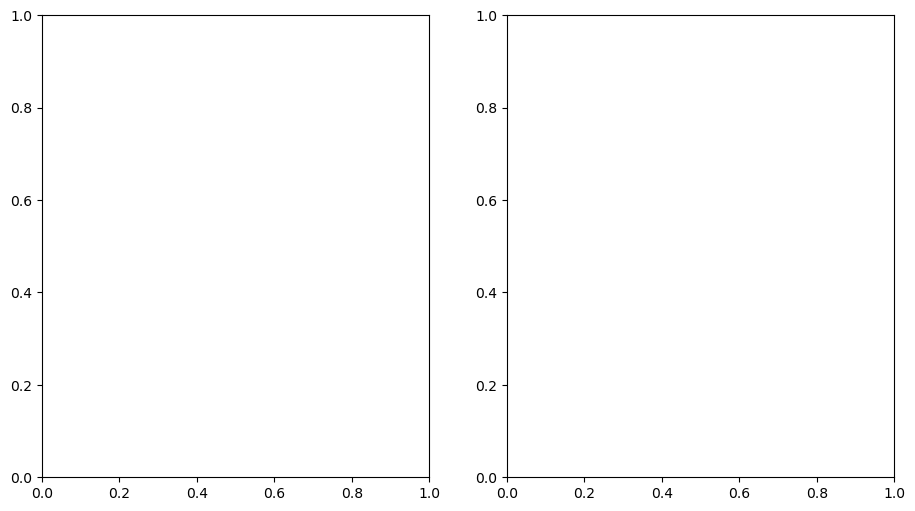

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(11, 6))
# count plot
sns.countplot(data=df, x="Type_Of_House", ax=ax[0])
ax[0].bar_label(ax[0].containers[0], label_type='edge')  # Show count labels on bars
ax[0].set_title("Count of House Types",fontsize=14)

custom_colors = ["#dedad2", "#e4bcad", "#df979e", "#d7658b", "#c80064"]


ax[1].pie(df["Type_Of_House"].value_counts(),labels=house_counts.index, autopct='%1.1f%%', colors=custom_colors,startangle=140)
ax[1].set_title("Distribution of House Types",fontsize = 14)

plt.tight_layout()
plt.show()

# Uni Variate Ploting

In [45]:
# type of houses

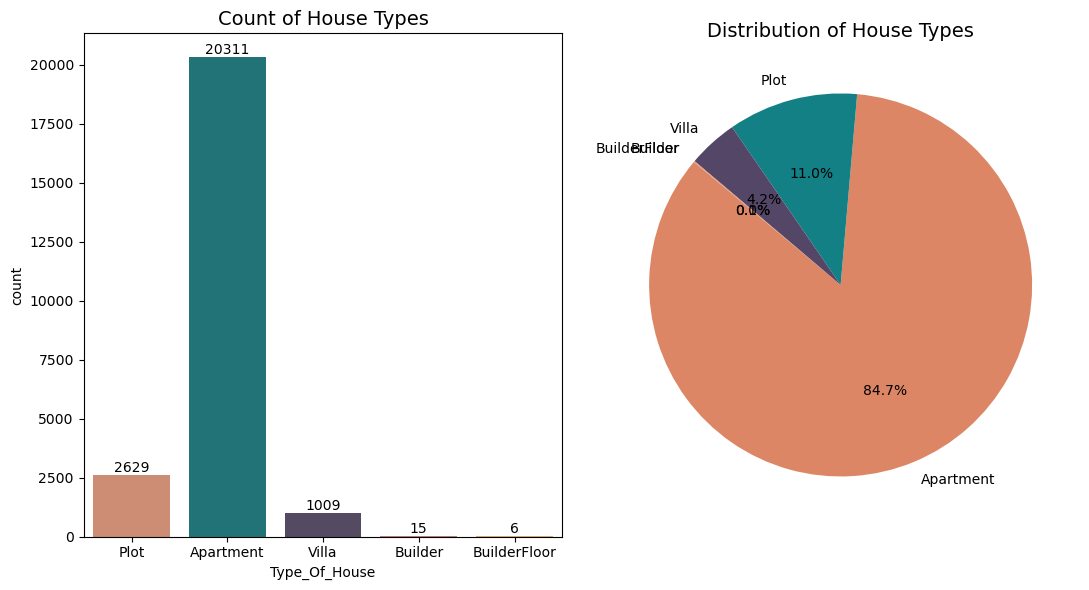

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(11, 6))
# count plot
sns.countplot(data=df, x="Type_Of_House", ax=ax[0])
ax[0].bar_label(ax[0].containers[0], label_type='edge')  # Show count labels on bars
ax[0].set_title("Count of House Types",fontsize=14)

custom_colors = ["#DC8665","#138086","#534666","#CD7672","#EEB462"]


ax[1].pie(df["Type_Of_House"].value_counts(),labels=house_counts.index, autopct='%1.1f%%', colors=custom_colors,startangle=140)
ax[1].set_title("Distribution of House Types",fontsize = 14)

plt.tight_layout()
plt.show()

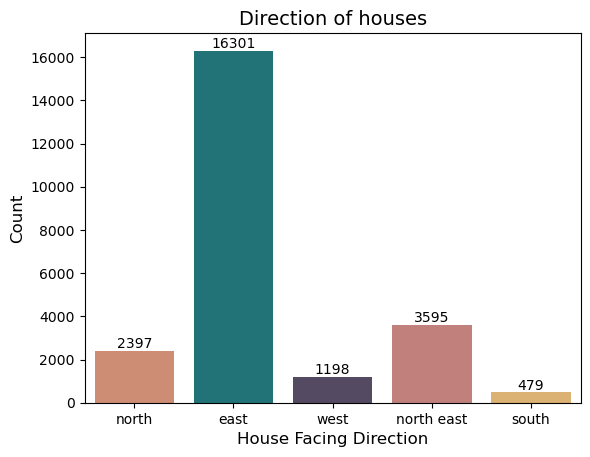

In [114]:
ax = sns.countplot(data = df,x="Direction",order=["north","east","west","north east","south"])
ax.bar_label(ax.containers[0], label_type='edge')


plt.xlabel("House Facing Direction", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Direction of houses", fontsize=14)
plt.show()

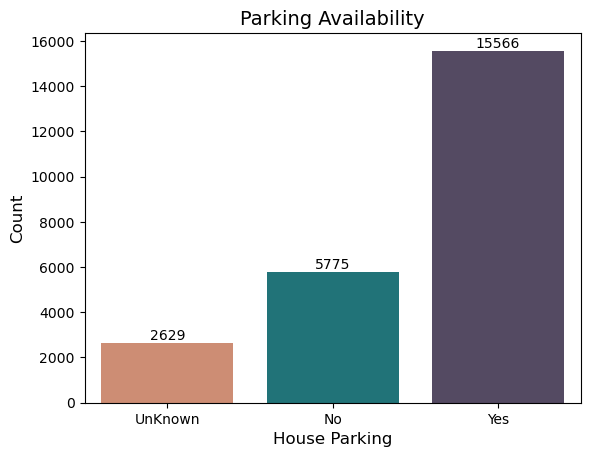

In [133]:
ax = sns.countplot(data = df,x="parking",palette=custom_colors)
ax.bar_label(ax.containers[0], label_type='edge')

plt.xlabel("House Parking", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Parking Availability", fontsize=14)
plt.show()

# Bivariate

In [150]:
import numpy as np

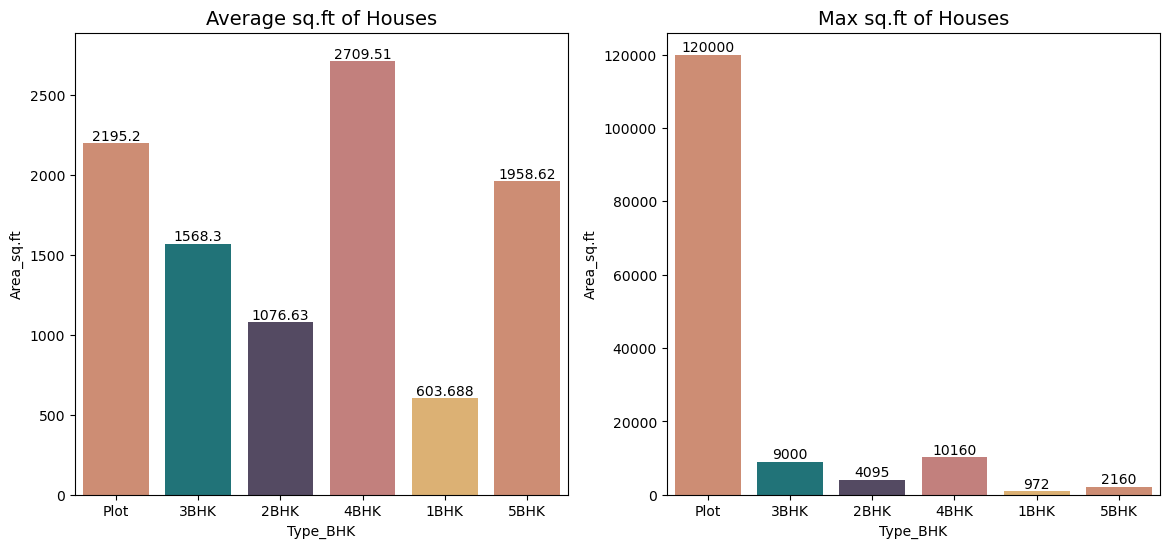

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df,x = "Type_BHK",y="Area_sq.ft",palette=custom_colors,errwidth=False,ax=ax[0])
ax[0].bar_label(ax[0].containers[0], label_type='edge')
ax[0].set_title("Average sq.ft of Houses",fontsize=14)

sns.barplot(data=df,x = "Type_BHK",y="Area_sq.ft",palette=custom_colors,estimator= np.max,errwidth=False,ax=ax[1])
ax[1].bar_label(ax[1].containers[0], label_type='edge')
ax[1].set_title("Max sq.ft of Houses",fontsize=14)
plt.show()

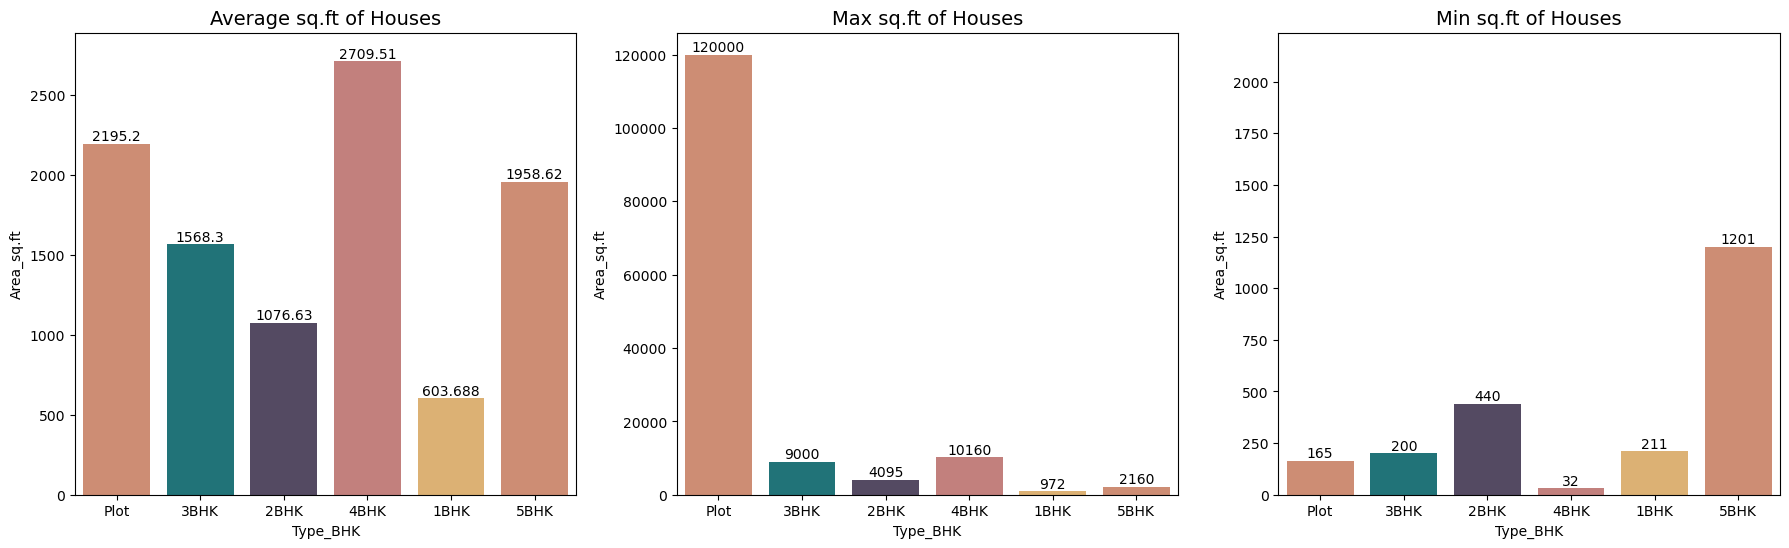

In [166]:
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

sns.barplot(data=df,x = "Type_BHK",y="Area_sq.ft",palette=custom_colors,errwidth=False,ax=ax[0])
ax[0].bar_label(ax[0].containers[0], label_type='edge')
ax[0].set_title("Average sq.ft of Houses",fontsize=14)

sns.barplot(data=df,x = "Type_BHK",y="Area_sq.ft",palette=custom_colors,estimator=np.max,errwidth=False,ax=ax[1])
ax[1].bar_label(ax[1].containers[0], label_type='edge')
ax[1].set_title("Max sq.ft of Houses",fontsize=14)

sns.barplot(data=df,x = "Type_BHK",y="Area_sq.ft",palette=custom_colors,estimator=np.min,errwidth=False,ax=ax[2])
ax[2].bar_label(ax[2].containers[0], label_type='edge')
ax[2].set_title("Min sq.ft of Houses",fontsize=14)
plt.show()

In [175]:
b1 = df[df["Type_BHK"]=="1BHK"]
b2 = df[df["Type_BHK"]=="2BHK"]
b3 = df[df["Type_BHK"]=="3BHK"]
b4 = df[df["Type_BHK"]=="4BHK"]
b5 = df[df["Type_BHK"]=="5BHK"]

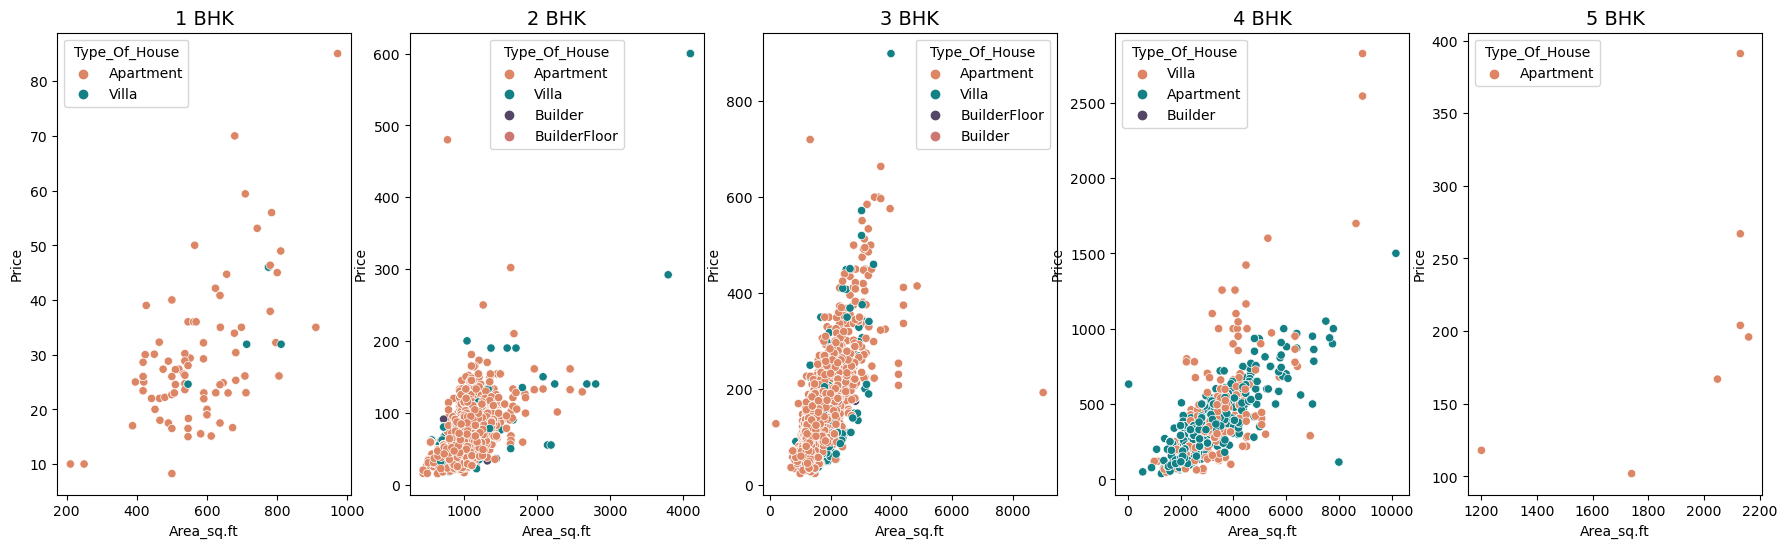

In [178]:
fig, ax = plt.subplots(1, 5, figsize=(22, 6))
sns.scatterplot(data = b1,x="Area_sq.ft",y = "Price",hue="Type_Of_House",ax=ax[0])
ax[0].set_title("1 BHK",fontsize=14)
sns.scatterplot(data = b2,x="Area_sq.ft",y = "Price",hue="Type_Of_House",ax=ax[1])
ax[1].set_title("2 BHK",fontsize=14)
sns.scatterplot(data = b3,x="Area_sq.ft",y = "Price",hue="Type_Of_House",ax=ax[2])
ax[2].set_title("3 BHK",fontsize=14)
sns.scatterplot(data = b4,x="Area_sq.ft",y = "Price",hue="Type_Of_House",ax=ax[3])
ax[3].set_title("4 BHK",fontsize=14)
sns.scatterplot(data = b5,x="Area_sq.ft",y = "Price",hue="Type_Of_House",ax=ax[4])
ax[4].set_title("5 BHK",fontsize=14)

plt.show()

In [ ]:
sns.kdeplot()